# 선형 회귀 (Linear Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 보스턴 집값 예측 데이터 
각 데이터베이스의 레코드는 보스턴 교외 또는 마을을 설명한다.

이 데이터는 1970년 보스턴 표준 도시 통계 지역(SMSA)에서 수집되었다. (UCI ML Repositor에서 발췌):

- CRIM: 마을별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거용 토지 비율
- INDUS: 비소매 업종이 차지하는 마을별 비율
- CHAS: 찰스강 더미 변수 (강과 인접한 지역이면 1, 아니면 0)
- NOX: 질소 산화물 농도 (1,000만분의 1 단위)
- RM: 주택당 평균 방 개수
- AGE: 1940년 이전에 지어진 자가 소유 주택 비율
- DIS: 보스턴 고용 센터 5곳까지의 가중 거리
- RAD: 방사형 고속도로 접근성 지수
- TAX: \$10,000당 전체 재산세율
- PTRATIO: 마을별 학생-교사 비율
- B: $1000(Bk−0.63)^2$ (여기서 Bk는 마을별 흑인 비율)
- LSTAT: 저소득층 인구 비율
- MEDV: (타겟) Median House Value 자가 소유 주택의 중앙값 (단위: \$1000s)

In [2]:
boston_df = pd.read_csv('./data/boston_housing_train.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
display(boston_df.info())
display(boston_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


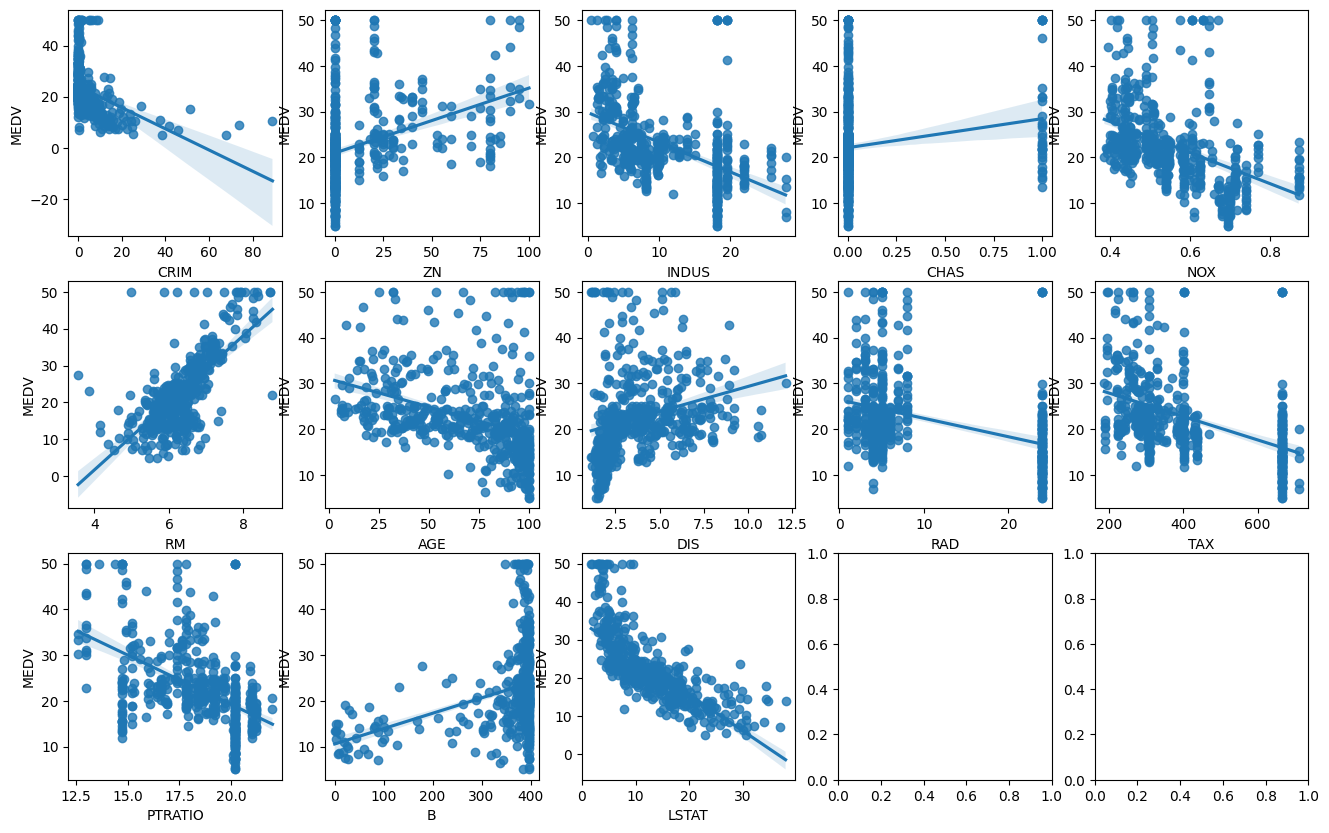

In [5]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=5, nrows=3)

columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
for i, col_name in enumerate(columns):
    row = i // 5
    col = i % 5
    ax_temp = ax[row][col]

    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    sns.regplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)

In [6]:
from sklearn.model_selection import train_test_split

# 입력-라벨 데이터 분리
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# 학습-테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# 학습 및 평가
from sklearn.linear_model import LinearRegression

# 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 평가 -> score 기본 평가 지표 : R^2 (결정계수)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.748087259862344, 0.684426728352709)

In [8]:
y_pred = lr.predict(X_test)

In [10]:
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')

evaluate_regression(y_test, y_pred)

MSE: 22.09869482709827, RMSE: 4.700924890603791, MAE: 3.0609395954370795, R2: 0.684426728352709


In [12]:
print(boston_df.columns)
coef = lr.coef_     # 회귀계수 (특성에 대한 가중치)
intercept = lr.intercept_   # 절편

coef, intercept

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


(array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
        -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
         2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]),
 np.float64(29.83642016383845))

# 다항회귀
- 회귀식이 선형이 아닌 2차, 3차 방정식으로 표현되는 회귀 기법

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train.shape, X_train_poly.shape, X_test.shape, X_test_poly.shape)
poly.get_feature_names_out()

(379, 13) (379, 104) (127, 13) (127, 104)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [ ]:
# 학습
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

print(lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test))

y_pred = lr_poly.predict(X_test_poly)
evaluate_regression(y_test, y_pred)

# 단순 회귀 성능 평가 결과
# 0.748087259862344, 0.684426728352709
# MSE: 22.09869482709827, RMSE: 4.700924890603791, MAE: 3.0609395954370795, R2: 0.684426728352709

0.9448313975211595 0.7758378393362159
MSE: 15.697435826658243, RMSE: 3.961998968533213, MAE: 2.5831967744134205, R2: 0.7758378393362159


##### 과대적합/과소적합 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

##### 캘리포니아 집값 예측해보기

**California Housing Dataset**는 머신러닝과 데이터 분석에서 자주 사용되는 데이터셋으로, 1990년 미국 캘리포니아 주의 인구 조사를 기반으로 수집된 주택 관련 데이터이다. 이 데이터셋은 캘리포니아 내의 블록 그룹(block group)을 나타내며, 각 레코드는 하나의 블록 그룹을 의미한다. 블록 그룹은 미국 인구 조사국에서 표본 데이터를 제공하는 가장 작은 지리적 단위이다.
- 데이터셋은 **20,640개의 레코드**로 구성되어 있다.
- **회귀 모델링**: 주택 가격 예측.
- **탐색적 데이터 분석(EDA)**: 주택 특징 간의 관계 분석.
- **특징 엔지니어링 및 선택**: 영향력 있는 특징 도출.


**특징**

1. **MedInc**: 블록 그룹 내의 중간 소득 (단위: 만 달러).
2. **HouseAge**: 블록 그룹 내의 중간 주택 연수.
3. **AveRooms**: 블록 그룹 내 가구당 평균 방 수.
4. **AveBedrms**: 블록 그룹 내 가구당 평균 침실 수.
5. **Population**: 블록 그룹 내 인구 수.
6. **AveOccup**: 블록 그룹 내 가구당 평균 거주자 수.
7. **Latitude**: 블록 그룹의 위도.
8. **Longitude**: 블록 그룹의 경도.

**목표 변수**

- **MedHouseVal**: 블록 그룹 내 가구의 중간 주택 가치 (단위: 만 달러).


In [20]:
# 캘리포니아 집값 데이터 로드
from sklearn.datasets import fetch_california_housing
california_data = fetch_california_housing()
california_data.keys()

print(california_data.feature_names)
print(california_data.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [23]:
# DataFrame 생성 -> 구조, 기초 통계
california_df = pd.DataFrame(data=california_data.data, columns=california_data.feature_names)
california_df[california_data.target_names[0]] = california_data.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [24]:
display(california_df.info())
display(california_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


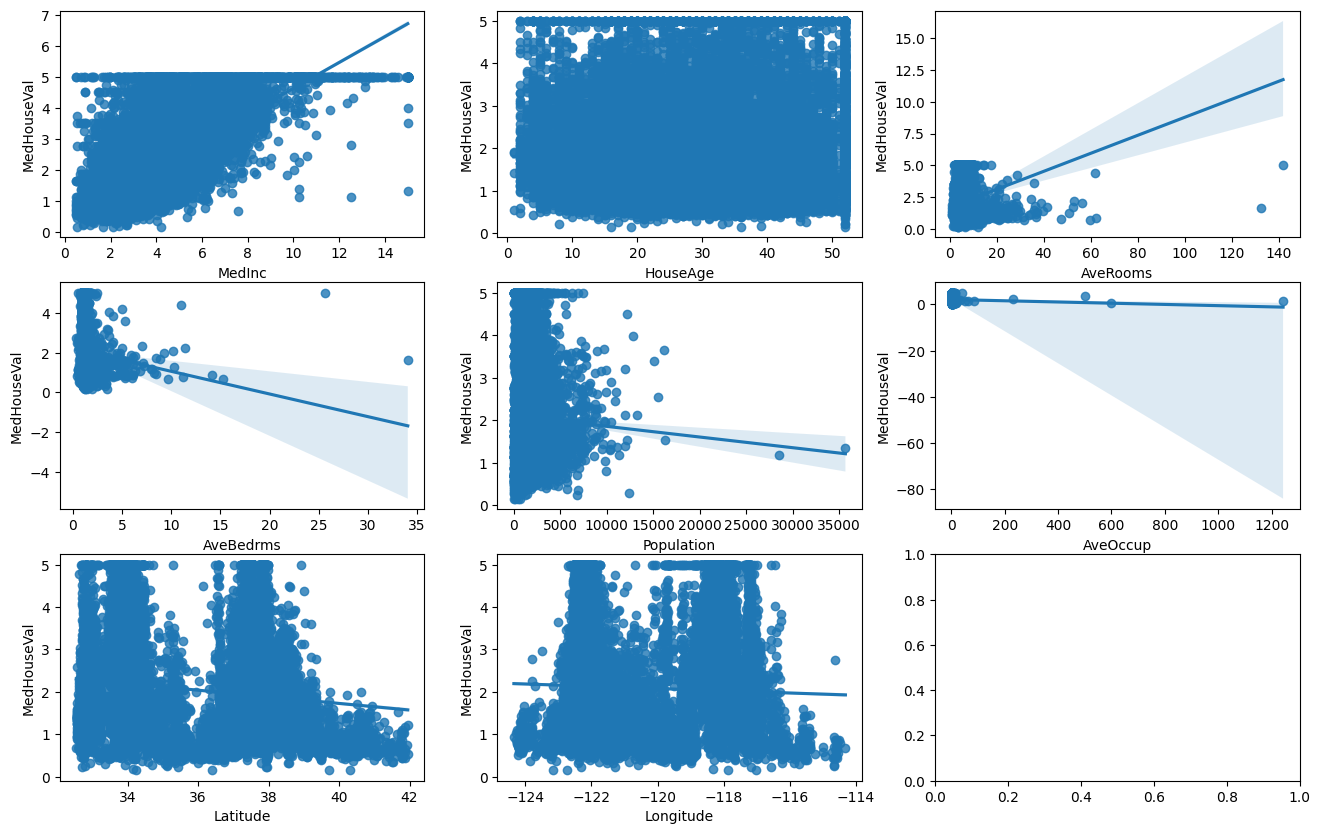

In [26]:
# 시각화 -> 특성 확인
fig, ax = plt.subplots(figsize=(16, 10), ncols=3, nrows=3)

columns = ['MedInc',
            'HouseAge',
            'AveRooms',
            'AveBedrms',
            'Population',
            'AveOccup',
            'Latitude',
            'Longitude']
for i, col_name in enumerate(columns):
    row = i // 3
    col = i % 3
    ax_temp = ax[row][col]

    sns.regplot(data=california_df, x=col_name, y='MedHouseVal', ax=ax_temp)

In [27]:
# 다중회귀 (훈련, 평가, 다른 평가 지표들로 평가)
X = california_data.data
y = california_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))
evaluate_regression(y_test, lr.predict(X_test))

0.609873031052925 0.5910509795491351
MSE: 0.5411287478470689, RMSE: 0.7356145375446769, MAE: 0.5296964012919744, R2: 0.5910509795491351


In [29]:
# 다항회귀 (훈련, 평가, 다른 평가 지표들로 평가)
from sklearn.pipeline import Pipeline

model = Pipeline([
    # (이름, 객체)
    ('poly', PolynomialFeatures(include_bias=False, degree=2)),
    ('lr', LinearRegression())
])

model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))
evaluate_regression(y_test, model.predict(X_test))

0.6829089327528398 0.6563005879298475
MSE: 0.45478928469921964, RMSE: 0.6743806675010929, MAE: 0.4646020777049507, R2: 0.6563005879298475


In [ ]:
lr = model.named_steps['lr']

coef = lr.coef_
intercept = lr.intercept_

poly = model.named_steps['poly']

# 예측값 구해보기
X_sample = poly.transform(X_test)[0]
y_sample = np.dot(X_sample, coef) + intercept
print(y_sample, model.predict(X_test)[0])

0.5529987858901677 0.5529987858903951
